### 1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date.

In [164]:
import pandas as pd

# Charger un fichier CSV situé dans le même répertoire que le notebook
df = pd.read_csv('../data/data.csv', sep=';')

In [165]:
# Convertir la colonne 'date_heure' en objet datetime avec un fuseau horaire
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)

In [166]:
df

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21 08:00:00+00:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21 08:00:00+00:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21 08:00:00+00:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21 08:00:00+00:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21 08:00:00+00:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207791,2023-06-23 11:00:00+00:00,2023-06-23,13:00,76,Occitanie,281.0,Meilleur Statut,570.0,Définitif,851.0,4041,Consolidé,4892.0
2207792,2023-06-23 11:30:00+00:00,2023-06-23,13:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,1761,Consolidé,NaN
2207793,2023-06-23 12:00:00+00:00,2023-06-23,14:00,44,Grand Est,3552.0,Meilleur Statut,NaN,NaN,3552.0,4548,Consolidé,8100.0
2207794,2023-06-23 12:00:00+00:00,2023-06-23,14:00,52,Pays de la Loire,778.0,Meilleur Statut,NaN,NaN,778.0,2778,Consolidé,3556.0


In [167]:
df_hdf = df[df['region'] == 'Hauts-de-France']

In [168]:
df_hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183983 entries, 16 to 2207789
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   date_heure                          183983 non-null  datetime64[ns, UTC]
 1   date                                183983 non-null  object             
 2   heure                               183983 non-null  object             
 3   code_insee_region                   183983 non-null  int64              
 4   region                              183983 non-null  object             
 5   consommation_brute_gaz_grtgaz       90522 non-null   float64            
 6   statut_grtgaz                       91986 non-null   object             
 7   consommation_brute_gaz_terega       0 non-null       float64            
 8   statut_terega                       0 non-null       object             
 9   consommation_brute_gaz_t

In [193]:
# Créer un nouveau DataFrame avec la date en index
df_nouveau = df_hdf[["consommation_brute_electricite_rte"]].copy()
df_nouveau.index = df_hdf["date_heure"]

KeyError: 'date_heure'

In [194]:
df_nouveau

,consommation_brute_electricite_rte
date_heure,
2013-01-21 10:00:00+00:00,8514
2013-01-21 18:00:00+00:00,8797
2013-01-21 19:00:00+00:00,8567
2013-01-21 20:00:00+00:00,8009
2013-01-21 22:00:00+00:00,7541
...,...
2023-06-23 05:30:00+00:00,5940
2023-06-23 08:00:00+00:00,5095
2023-06-23 09:30:00+00:00,4983


In [170]:
df_hdf

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
16,2013-01-21 10:00:00+00:00,2013-01-21,11:00,32,Hauts-de-France,17925.0,Définitif,NaN,NaN,17925.0,8514,Définitif,26439.0
48,2013-01-21 18:00:00+00:00,2013-01-21,19:00,32,Hauts-de-France,16573.0,Définitif,NaN,NaN,16573.0,8797,Définitif,25370.0
53,2013-01-21 19:00:00+00:00,2013-01-21,20:00,32,Hauts-de-France,16077.0,Définitif,NaN,NaN,16077.0,8567,Définitif,24644.0
59,2013-01-21 20:00:00+00:00,2013-01-21,21:00,32,Hauts-de-France,14850.0,Définitif,NaN,NaN,14850.0,8009,Définitif,22859.0
70,2013-01-21 22:00:00+00:00,2013-01-21,23:00,32,Hauts-de-France,12586.0,Définitif,NaN,NaN,12586.0,7541,Définitif,20127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207756,2023-06-23 05:30:00+00:00,2023-06-23,07:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,5940,Consolidé,NaN
2207771,2023-06-23 08:00:00+00:00,2023-06-23,10:00,32,Hauts-de-France,2985.0,Meilleur Statut,NaN,NaN,2985.0,5095,Consolidé,8080.0
2207779,2023-06-23 09:30:00+00:00,2023-06-23,11:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,4983,Consolidé,NaN
2207786,2023-06-23 10:30:00+00:00,2023-06-23,12:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,5464,Consolidé,NaN


/tmp/ipykernel_124185/2397263745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf["date_heure"] = pd.to_datetime(df_hdf["date_heure"])


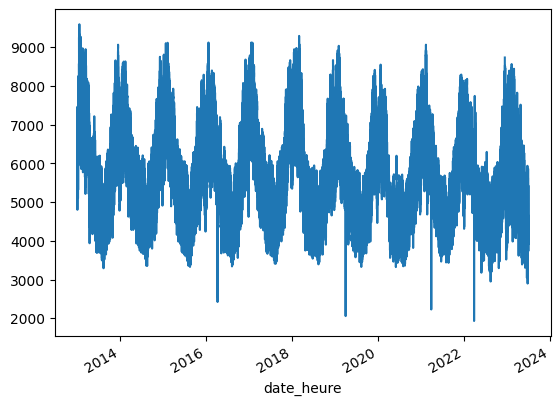

In [171]:
import matplotlib.pyplot as plt

df_hdf["date_heure"] = pd.to_datetime(df_hdf["date_heure"])
df_1 = df_hdf.set_index("date_heure")
y = df_1["consommation_brute_electricite_rte"]
y.plot()
plt.show()

### 2. Affichez cette même série temporelle en rassemblant:
Par année
Par trimestre
Par mois
Par semaine
Par jour

/tmp/ipykernel_124185/2840476405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf["date_heure"] = pd.to_datetime(df_hdf["date_heure"])


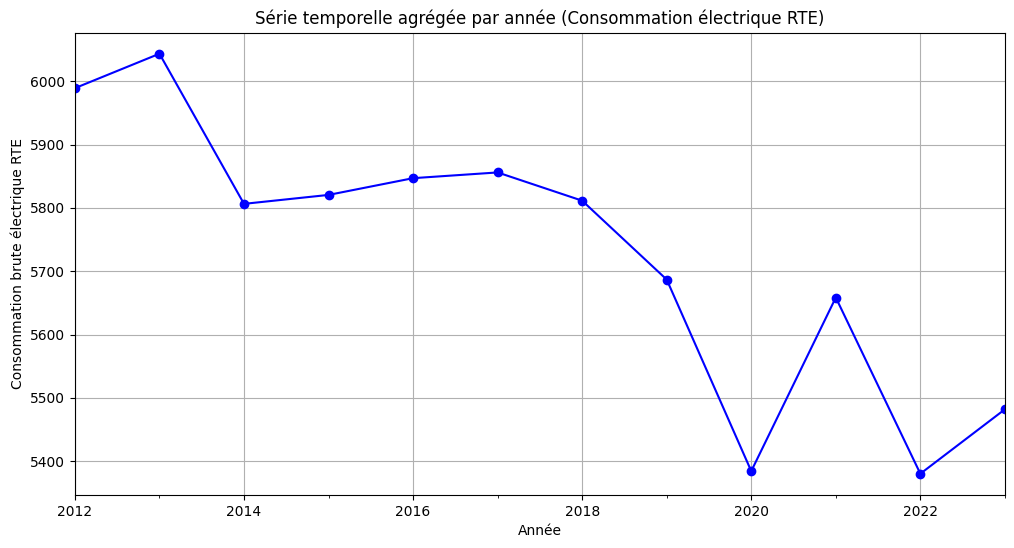

In [172]:
# Convertir la colonne "date_heure" en objets datetime
df_hdf["date_heure"] = pd.to_datetime(df_hdf["date_heure"])

# Définir la colonne "date_heure" comme index du DataFrame
df_hdf = df_hdf.set_index("date_heure")

# Agréger les données par année et calculer la somme des valeurs
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('Y').mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 6))
df_aggregated.plot(ax=ax, kind='line', marker='o', color='blue')
ax.set_title('Série temporelle agrégée par année (Consommation électrique RTE)')
ax.set_xlabel('Année')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()


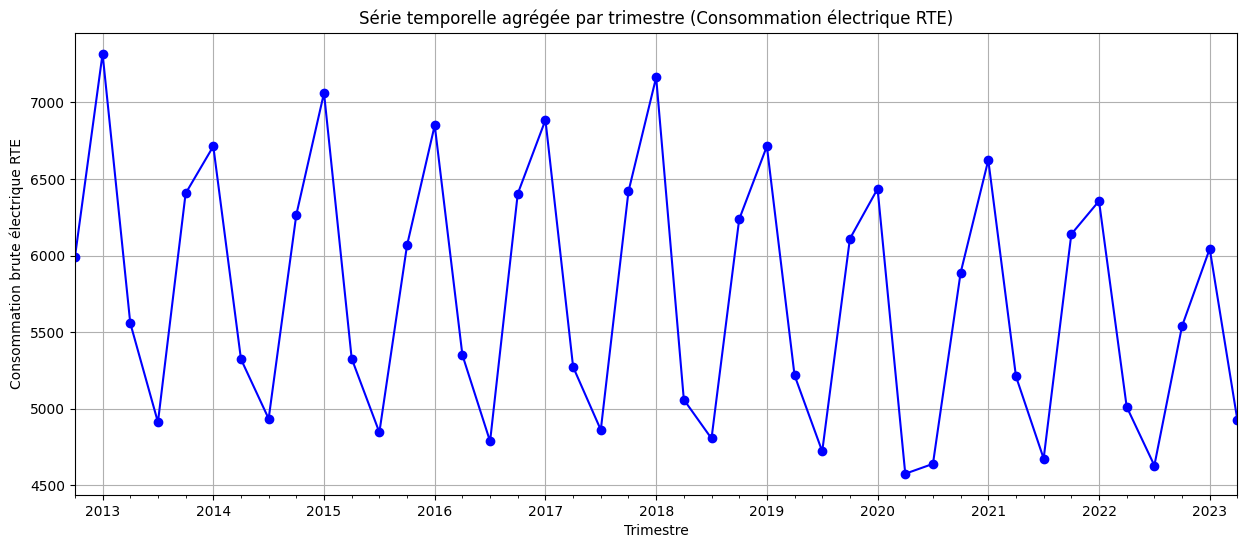

In [173]:
# Agréger les données par trimestre et calculer la somme des valeurs
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('Q').mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))
df_aggregated.plot(ax=ax, kind='line', marker='o', color='blue')
ax.set_title('Série temporelle agrégée par trimestre (Consommation électrique RTE)')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

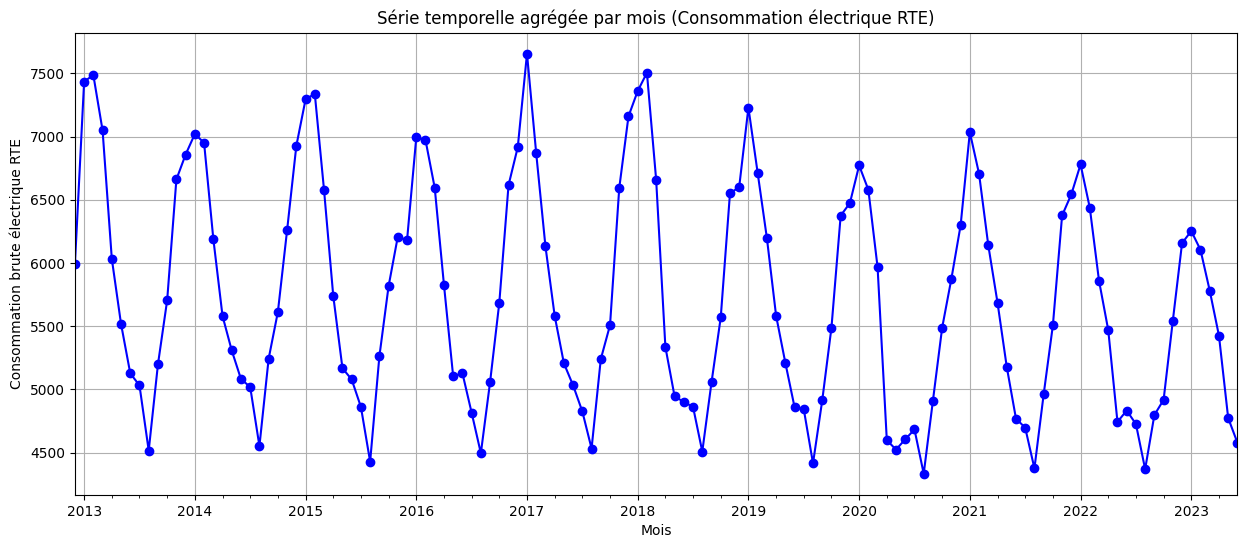

In [174]:
# Agréger les données par trimestre et calculer la somme des valeurs
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('M').mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))
df_aggregated.plot(ax=ax, kind='line', marker='o', color='blue')
ax.set_title('Série temporelle agrégée par mois (Consommation électrique RTE)')
ax.set_xlabel('Mois')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

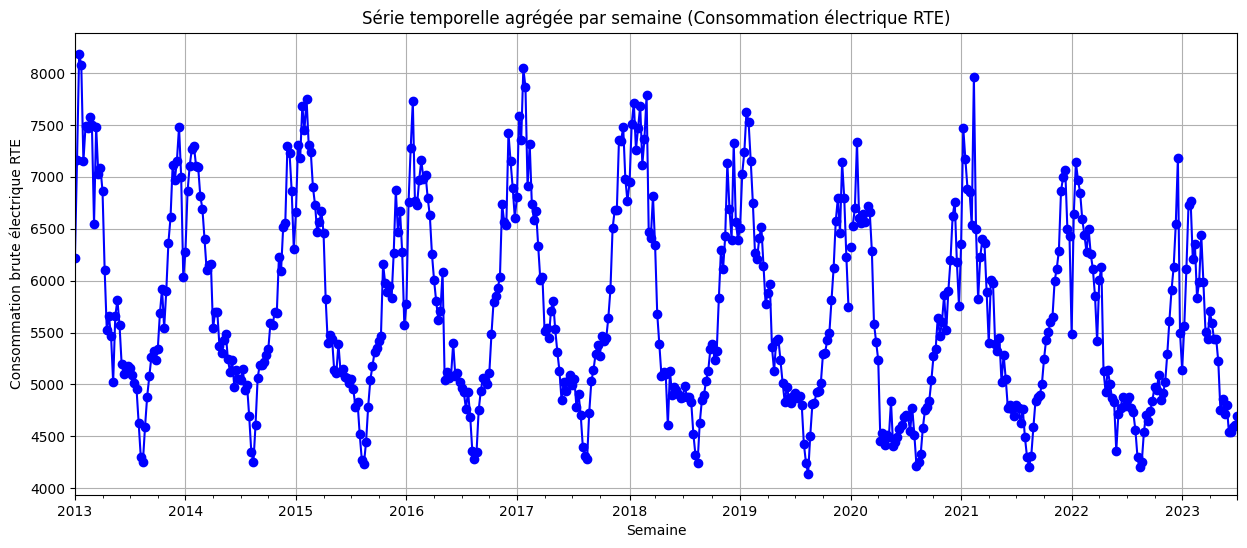

In [175]:
# Agréger les données par trimestre et calculer la somme des valeurs
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('W').mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))
df_aggregated.plot(ax=ax, kind='line', marker='o', color='blue')
ax.set_title('Série temporelle agrégée par semaine (Consommation électrique RTE)')
ax.set_xlabel('Semaine')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

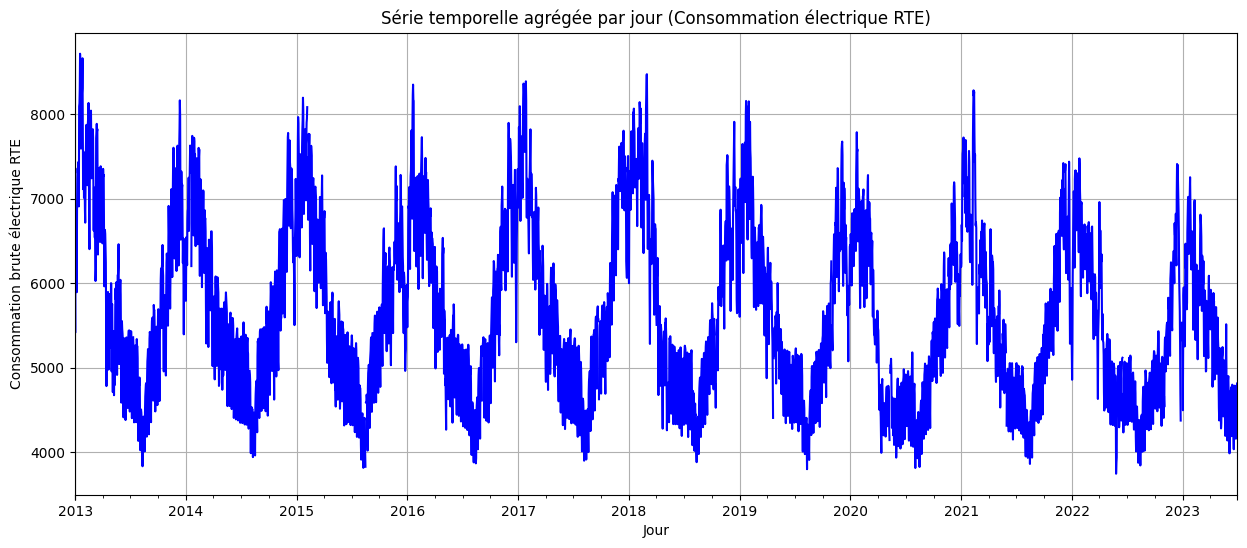

In [176]:
# Agréger les données par trimestre et calculer la somme des valeurs
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))
df_aggregated.plot(ax=ax, kind='line', color='blue')
ax.set_title('Série temporelle agrégée par jour (Consommation électrique RTE)')
ax.set_xlabel('Jour')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

### 3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

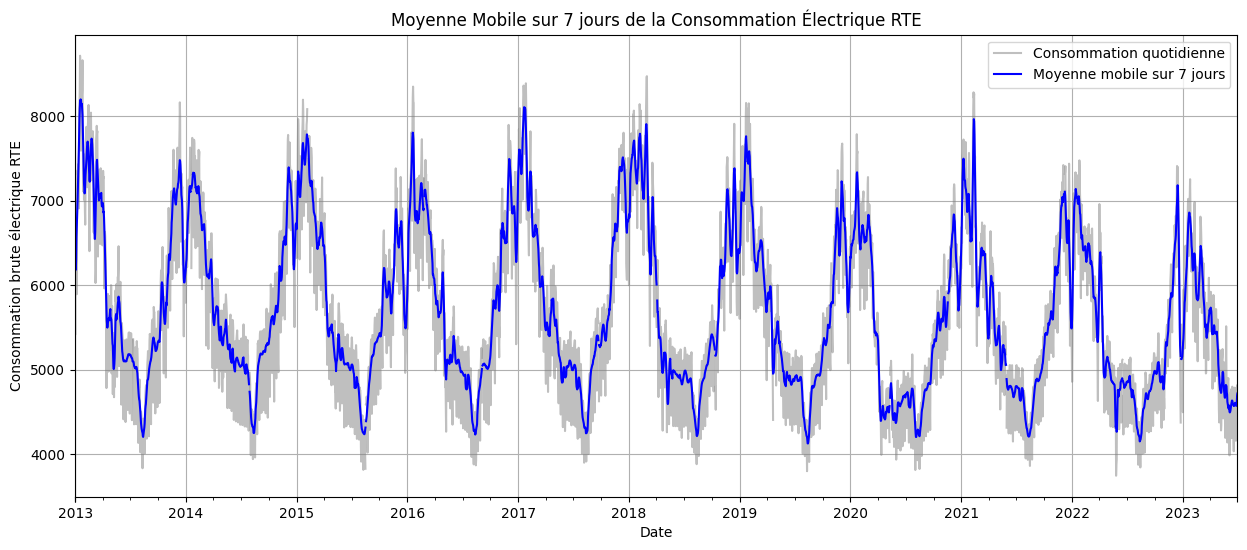

In [218]:
# Agréger les données par jour et calculer la somme des valeurs
df_daily = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Créer une fenêtre de moyenne mobile sur 7 jours
rolling_window = df_daily.rolling(window=7, center=True, min_periods=1, win_type=None)

# Calculer la moyenne mobile sur 7 jours
df_rolling_mean = rolling_window.mean()

# Créer le graphique
fig, ax = plt.subplots(figsize=(15, 6))
df_daily.plot(ax=ax, label='Consommation quotidienne', color='gray', alpha=0.5)
df_rolling_mean.plot(ax=ax, label='Moyenne mobile sur 7 jours', color='blue')
ax.set_title('Moyenne Mobile sur 7 jours de la Consommation Électrique RTE')
ax.set_xlabel('Date')
ax.set_ylabel('Consommation brute électrique RTE')
ax.legend()
plt.grid(True)
plt.show()

### 4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

Les `agrégations` précédentes regroupent les données sur des périodes de temps specifiques en calculant une statistique et permettent de réduire la granularité et d'obtenir une vue agrégée des tendances sur des périodes plus longues.  
La `moyenne mobile` calcule une nouvelle valeur pour chaque point de données en prenant la moyenne des valeurs sur une fenêtre glissante de temps. Elle est principalement utilisée pour lisser les données et révéler les tendances à court terme.  
La `moyenne mobile` est une technique de lissage qui met en évidence les tendances à court terme, tandis que les `agrégations` permettent d'obtenir une vue agrégée des données sur des périodes plus longues. 

### 5. A l’aide de box-plot, observez la saisonnalité:
trimestrielle (chaque trimestre)
mensuelle (chaque mois)
hebdomadaire (chaque jour)
journalière (chaque heure)

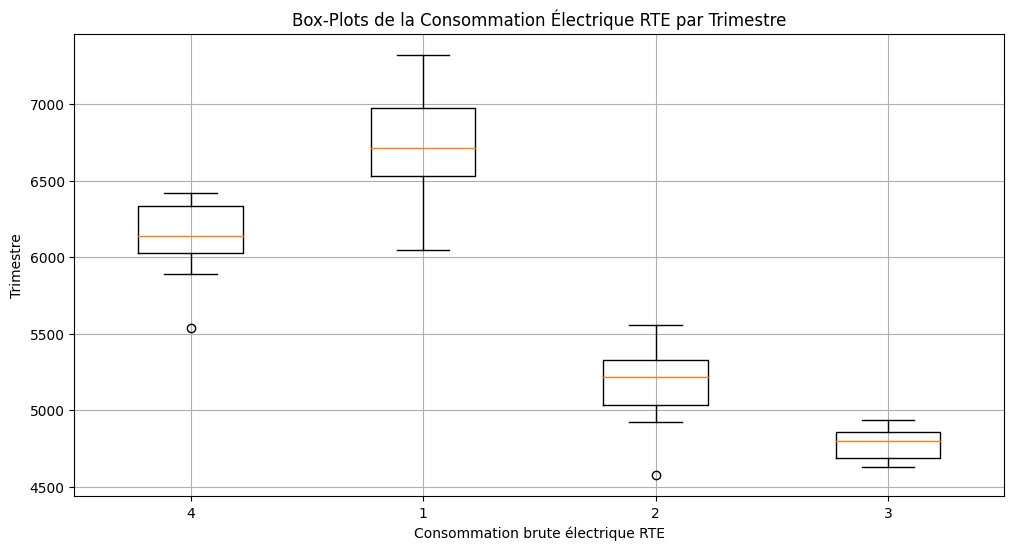

In [ ]:
# Agréger les données par trimestre et calculer la moyenne des valeurs
df_quarterly = df_hdf["consommation_brute_electricite_rte"].resample('Q').mean()

# Extraire les trimestres (quartiers de l'année)
quarters = df_quarterly.index.quarter.unique()

# Créer un box-plot pour chaque trimestre avec les ordonnées et abscisses échangées
fig, ax = plt.subplots(figsize=(12, 6))
box_plot_data = [df_quarterly[df_quarterly.index.quarter == q] for q in quarters]
ax.boxplot(box_plot_data, labels=quarters, vert=True)
ax.set_title('Box-Plots de la Consommation Électrique RTE par Trimestre')
ax.set_xlabel('Consommation brute électrique RTE')
ax.set_ylabel('Trimestre')
plt.grid(True)
plt.show()

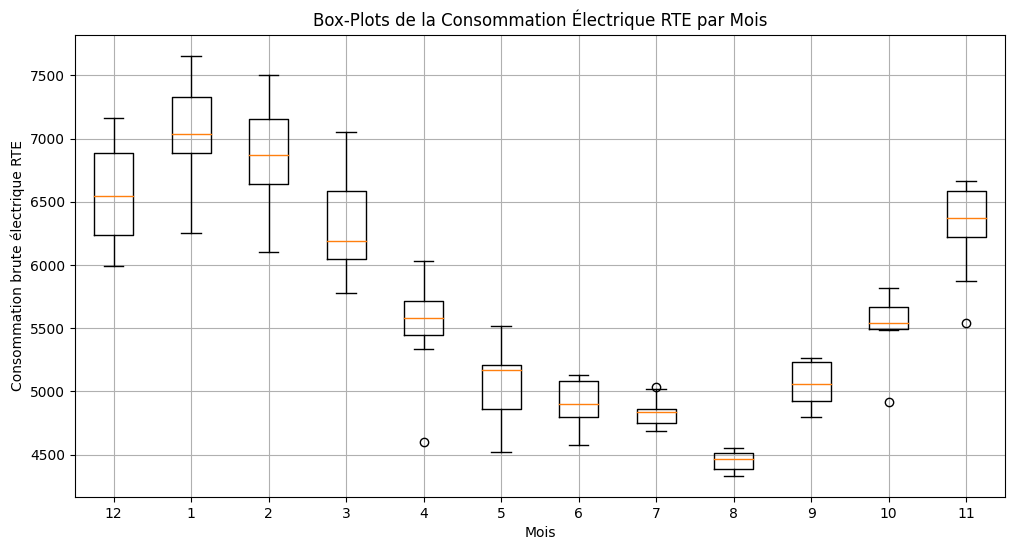

In [179]:
# Agréger les données par mois et calculer la somme des valeurs
df_monthly = df_hdf["consommation_brute_electricite_rte"].resample('M').mean()

# Extraire les mois uniques à partir de l'index de la série temporelle
months = df_monthly.index.month.unique()

# Créer un box-plot pour chaque mois
fig, ax = plt.subplots(figsize=(12, 6))
box_plot_data = [df_monthly[df_monthly.index.month == m] for m in months]
ax.boxplot(box_plot_data, labels=months, vert=True)
ax.set_title('Box-Plots de la Consommation Électrique RTE par Mois')
ax.set_xlabel('Mois')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

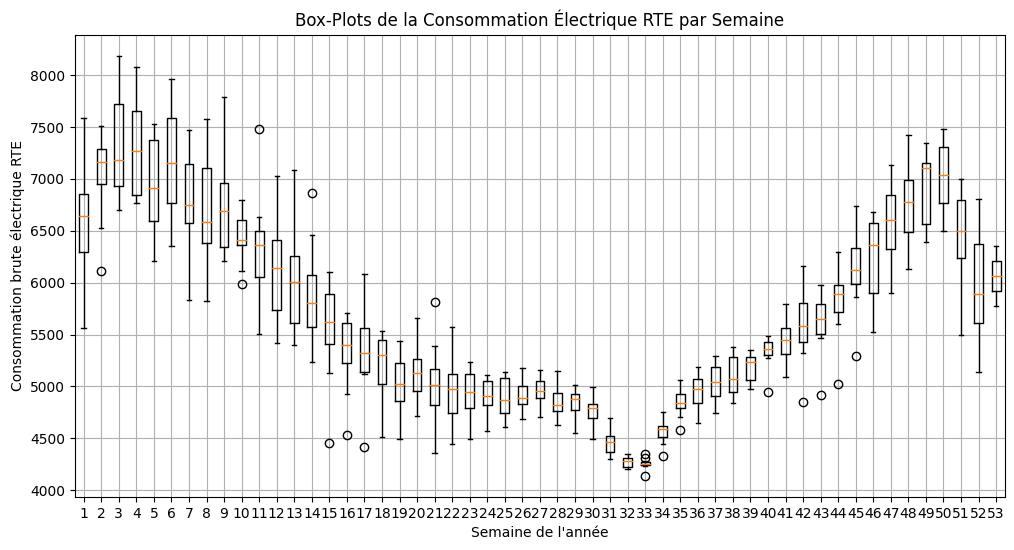

In [180]:
# Agréger les données par semaine et calculer la somme des valeurs
df_weekly = df_hdf["consommation_brute_electricite_rte"].resample('W').mean()

# Extraire les semaines uniques à partir de l'index de la série temporelle
weeks = df_weekly.index.isocalendar().week.unique()

# Créer un box-plot pour chaque semaine
fig, ax = plt.subplots(figsize=(12, 6))
box_plot_data = [df_weekly[df_weekly.index.isocalendar().week == w] for w in weeks]
ax.boxplot(box_plot_data, labels=weeks, vert=True)
ax.set_title('Box-Plots de la Consommation Électrique RTE par Semaine')
ax.set_xlabel('Semaine de l\'année')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

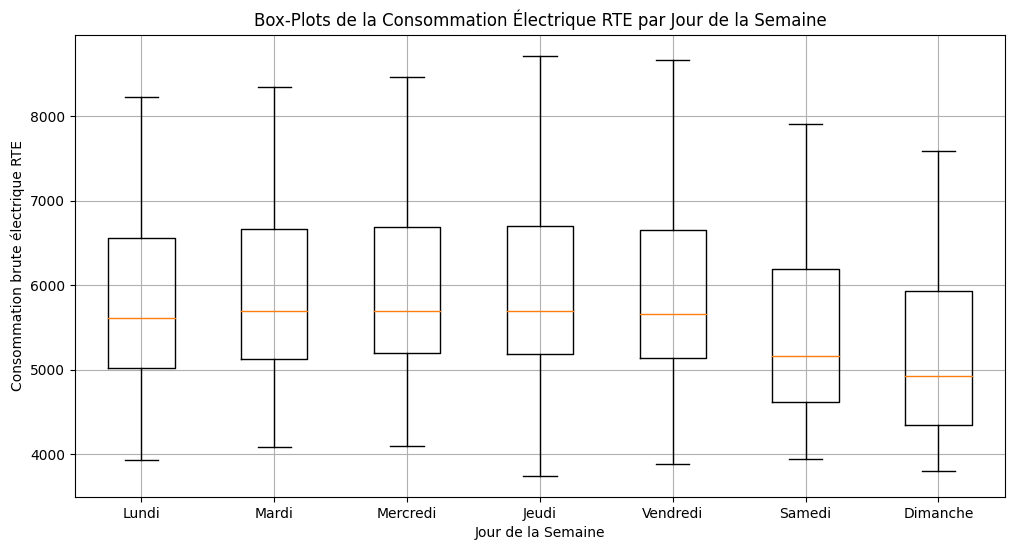

In [181]:
# Agréger les données par jour de la semaine et calculer la moyenne des valeurs
df_weekday = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Extraire les jours de la semaine (0 = lundi, 1 = mardi, ..., 6 = dimanche)
weekdays = df_weekday.index.weekday.unique()

# Créer un box-plot pour chaque jour de la semaine
fig, ax = plt.subplots(figsize=(12, 6))
box_plot_data = [df_weekday[df_weekday.index.weekday == wd] for wd in weekdays]
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
ax.boxplot(box_plot_data, labels=day_names, vert=True)
ax.set_title('Box-Plots de la Consommation Électrique RTE par Jour de la Semaine')
ax.set_xlabel('Jour de la Semaine')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

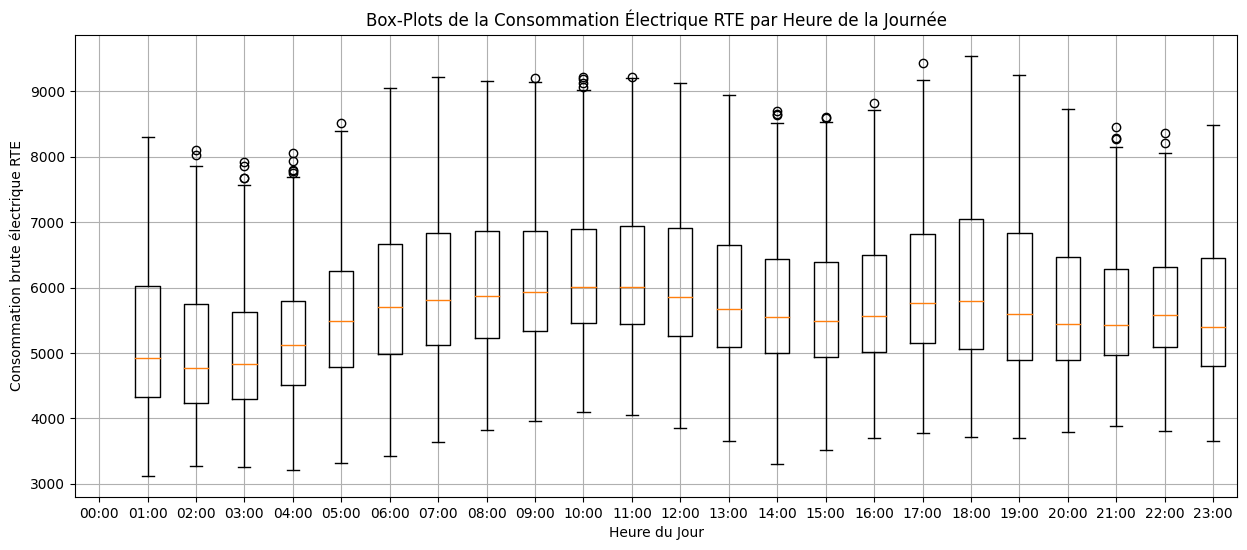

In [182]:
# Créer une nouvelle colonne "heure_format" avec l'heure au format texte
df_hdf["heure_format"] = df_hdf.index.strftime('%H:%M')

# Agréger les données par heure de la journée et calculer la moyenne des valeurs
df_hourly = df_hdf["consommation_brute_electricite_rte"].resample('H').mean()

# Trier les données par l'heure formatée
df_hourly = df_hourly.sort_index()

# Créer un box-plot pour chaque heure de la journée
fig, ax = plt.subplots(figsize=(15, 6))
box_plot_data = [df_hourly[df_hourly.index.hour == h] for h in range(24)]
ax.boxplot(box_plot_data, labels=[f"{h:02}:00" for h in range(24)], vert=True)
ax.set_title('Box-Plots de la Consommation Électrique RTE par Heure de la Journée')
ax.set_xlabel('Heure du Jour')
ax.set_ylabel('Consommation brute électrique RTE')
plt.grid(True)
plt.show()

**A partir d’ici on travaille sur les times series moyennisées par jour.**  

### 6. Qu’est ce que la stationnarité? 

 Une série temporelle est dite `stationnaire` lorsque ses propriétés statistiques ne changent pas avec le temps. En d'autres termes, la stationnarité suppose que la série ne présente pas de tendance globale, de variations saisonnières ou d'autres structures temporelles importantes.

Pour qu'une série temporelle soit considérée comme stationnaire, elle doit satisfaire aux trois critères suivants :

**Moyenne constante** : La moyenne des valeurs de la série ne doit pas dépendre du temps. Cela signifie que la série ne présente pas de tendance globale à la hausse ou à la baisse.  
**Variance constante** : La variance des valeurs de la série ne doit pas dépendre du temps. Cela signifie que l'amplitude des variations reste constante.  
**Autocorrélation constante** : La structure de dépendance temporelle entre les observations doit rester constante dans le temps. En d'autres termes, la série ne doit pas présenter de motifs saisonniers ou cycliques importants.

La `stationnarité` simplifie l'analyse des séries temporelles car de nombreux modèles et techniques d'analyse supposent que les données sont stationnaires. Lorsqu'une série n'est pas stationnaire, des transformations (telles que la différenciation ou la décomposition saisonnière) peuvent être nécessaires pour la rendre stationnaire avant d'appliquer des modèles de prévision ou d'analyse.  
Dans la pratique, de nombreuses séries temporelles ne sont pas strictement stationnaires, mais elles peuvent souvent être transformées ou modélisées pour supprimer les non-stationnarités. La stationnarité est un concept fondamental en économétrie, en prévision et en analyse des séries temporelles.

### 7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 

In [183]:
df_aggregated = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()
moyenne = df_aggregated.mean()
variance = df_aggregated.var()

print('moyenne de la série temporelle :',moyenne)
print('variance de la série temporelle :',variance)

moyenne de la série temporelle : 5717.670656660159
variance de la série temporelle : 1015392.8789056444


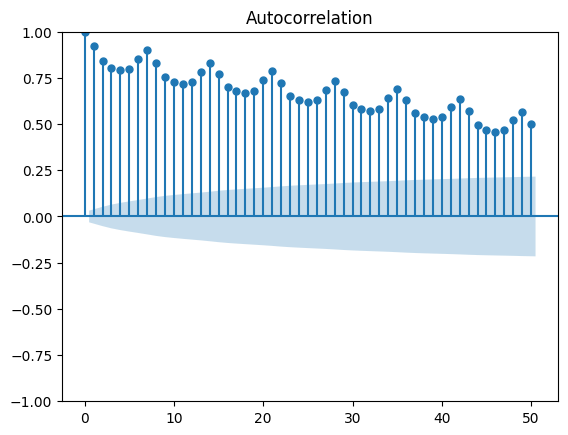

In [205]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_aggregated, lags=50) 
plt.show()

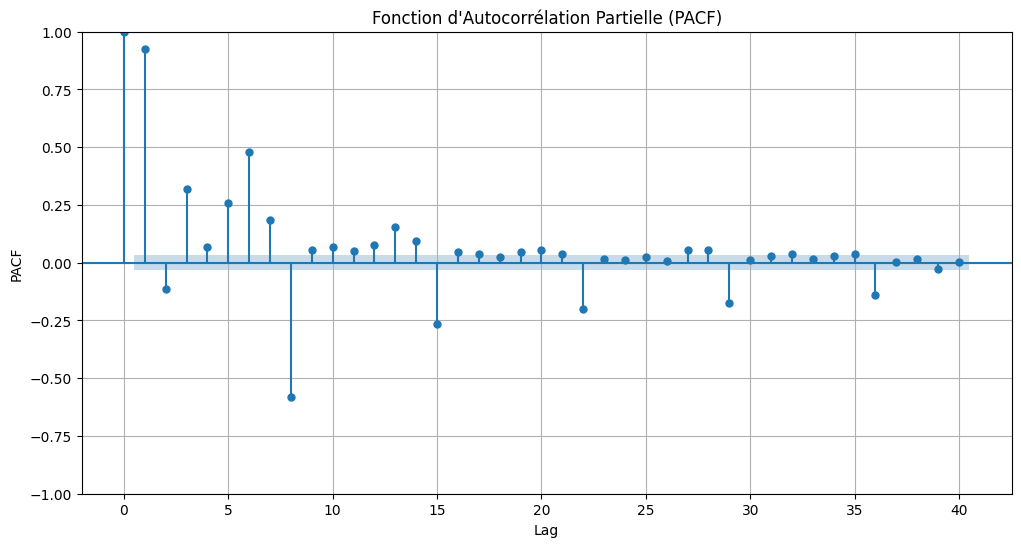

In [185]:
from statsmodels.graphics.tsaplots import plot_pacf

# Tracer la PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df_aggregated, lags=40, ax=ax)  # Vous pouvez ajuster le nombre de retards (lags) selon vos besoins
ax.set_title('Fonction d\'Autocorrélation Partielle (PACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('PACF')
plt.grid(True)
plt.show()

On observe sur le graphique que la time série présente des motifs saisonniers et cycliques importants, et a une tendance globale a la baisse donc la time series est `non-stationnaire`.

### 8.Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 

L'hypothese nulle H0 est "la time series est non-stationnaire".

In [198]:
from statsmodels.tsa.stattools import adfuller

# Sélectionnez la série temporelle que vous souhaitez tester
series = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Effectuez le test de Dickey-Fuller
result = adfuller(series)

# Examinez les résultats du test
print("Statistique de test :", result[0])
print("Valeur critique à 1 % :", result[4]["1%"])
print("Valeur critique à 5 % :", result[4]["5%"])
print("Valeur critique à 10 % :", result[4]["10%"])
print("P-valeur :", result[1])

# Interprétation des résultats
if result[1] <= 0.05:
    print("La série est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")


Statistique de test : -4.236425652702576
Valeur critique à 1 % : -3.432070672988693
Valeur critique à 5 % : -2.8623002987378547
Valeur critique à 10 % : -2.567174716967499
P-valeur : 0.0005713466895179795
La série est stationnaire (rejeter l'hypothèse nulle)


### 9. Même consigne pour le test de KPSS

In [199]:
from statsmodels.tsa.stattools import kpss

# Sélectionnez la série temporelle que vous souhaitez tester
series = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Effectuez le test de KPSS
result = kpss(series)

# Examinez les résultats du test
print("Statistique de test :", result[0])
print("Valeur critique à 1 % :", result[3]["1%"])
print("Valeur critique à 5 % :", result[3]["5%"])
print("Valeur critique à 10 % :", result[3]["10%"])
print("P-valeur :", result[1])

# Interprétation des résultats
if result[1] <= 0.05:
    print("La série n'est pas stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série est stationnaire (ne pas rejeter l'hypothèse nulle)")


Statistique de test : 0.49341650122711717
Valeur critique à 1 % : 0.739
Valeur critique à 5 % : 0.463
Valeur critique à 10 % : 0.347
P-valeur : 0.043149436660559204
La série n'est pas stationnaire (rejeter l'hypothèse nulle)


### 10. Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

In [200]:
from statsmodels.tsa.stattools import adfuller

# Sélectionnez la série temporelle que vous souhaitez désaisonnaliser
series = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

# Estimez la composante saisonnière annuelle en calculant la moyenne mobile sur 365 jours
period = 365
seasonal_component = series.rolling(window=period, min_periods=1, center=True).mean()

# Désaisonnalisez la série temporelle en soustrayant la composante saisonnière
deseasonalized_series = series - seasonal_component

# Effectuez le test de Dickey-Fuller sur la série désaisonnalisée
result = adfuller(deseasonalized_series.dropna())  # Assurez-vous de supprimer les valeurs manquantes

# Examinez les résultats du test
print("Statistique de test :", result[0])
print("Valeur critique à 1 % :", result[4]["1%"])
print("Valeur critique à 5 % :", result[4]["5%"])
print("Valeur critique à 10 % :", result[4]["10%"])
print("P-valeur :", result[1])

# Interprétation des résultats
if result[1] <= 0.05:
    print("La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série désaisonnalisée n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")


Statistique de test : -4.299875014482452
Valeur critique à 1 % : -3.432070672988693
Valeur critique à 5 % : -2.8623002987378547
Valeur critique à 10 % : -2.567174716967499
P-valeur : 0.00044443377861657084
La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)


### 11. Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. Que peut-on en conclure?

In [201]:
from statsmodels.tsa.stattools import kpss

# Sélectionnez la série temporelle désaisonnalisée
deseasonalized_series = series - seasonal_component

# Effectuez le test de KPSS sur la série désaisonnalisée
result = kpss(deseasonalized_series.dropna())  # Assurez-vous de supprimer les valeurs manquantes

# Examinez les résultats du test
print("Statistique de test :", result[0])
print("Valeur critique à 1 % :", result[3]["1%"])
print("Valeur critique à 5 % :", result[3]["5%"])
print("Valeur critique à 10 % :", result[3]["10%"])
print("P-valeur :", result[1])

# Interprétation des résultats
if result[1] <= 0.05:
    print("La série désaisonnalisée n'est pas stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série désaisonnalisée est stationnaire (ne pas rejeter l'hypothèse nulle)")


Statistique de test : 0.030058667798398962
Valeur critique à 1 % : 0.739
Valeur critique à 5 % : 0.463
Valeur critique à 10 % : 0.347
P-valeur : 0.1
La série désaisonnalisée est stationnaire (ne pas rejeter l'hypothèse nulle)


/tmp/ipykernel_124185/998630094.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(deseasonalized_series.dropna())  # Assurez-vous de supprimer les valeurs manquantes


### 12. Pour vous la série temporelle est plutôt additive ou multiplicative? 

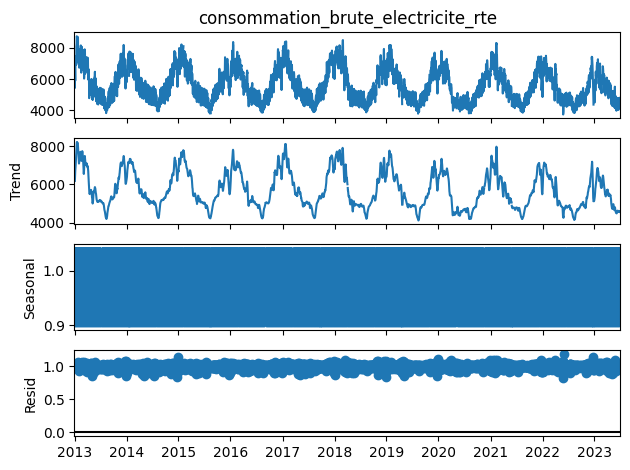

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

period = 365

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.show()

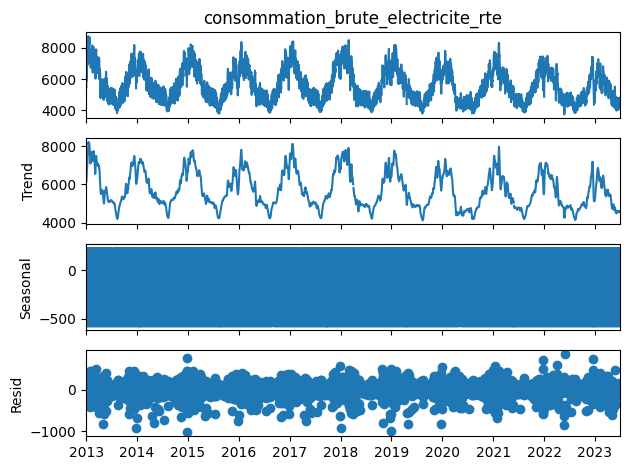

In [207]:
analysis = df_hdf["consommation_brute_electricite_rte"].resample('D').mean()

period = 365

decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.show()

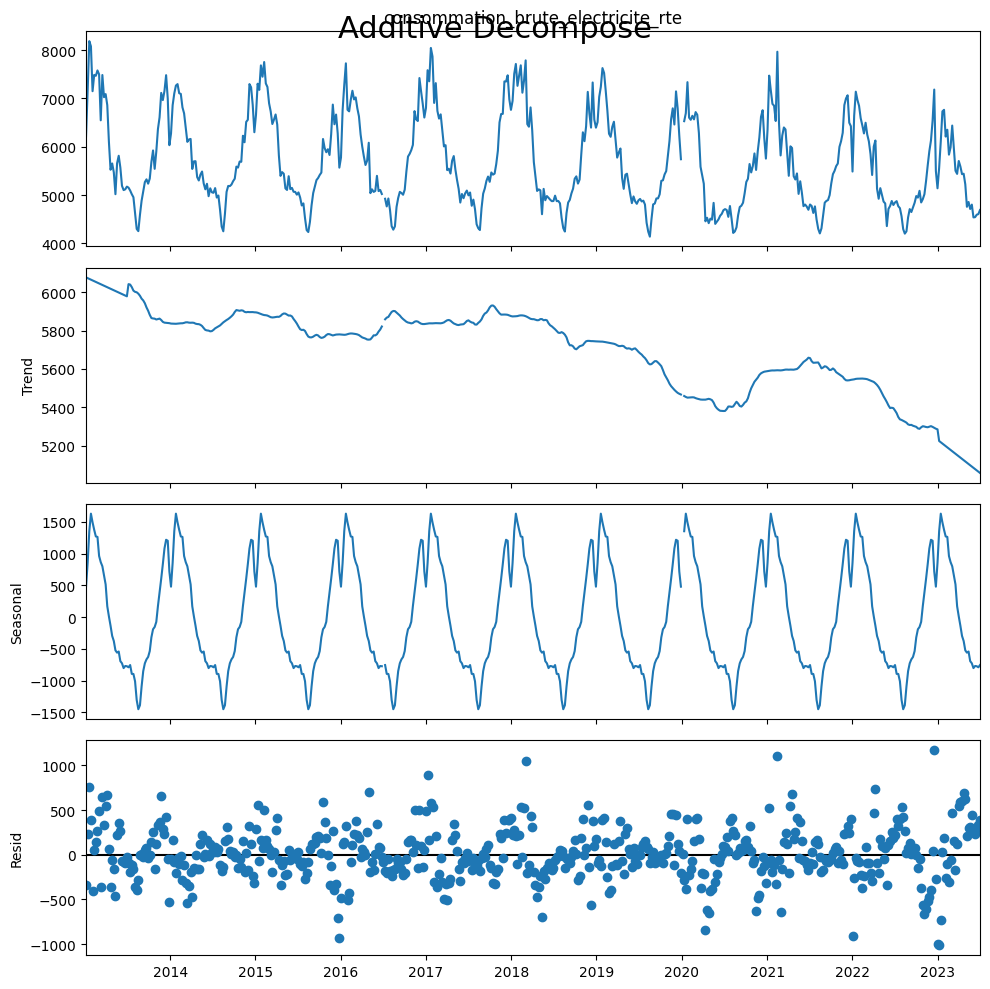

In [221]:
from dateutil.parser import parse

# Appliquez la décomposition saisonnière avec l'option "extrapolate_trend" définie sur "freq"
result_add = seasonal_decompose(df_nouveau["consommation_brute_electricite_rte"].resample('W').mean(), model='additive', extrapolate_trend='freq')

# Tracer les composantes de la décomposition
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


On observe une saisonnalité constante en amplitude, la time series est donc `additive`. 